In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import loguniform, randint, uniform

import mlflow_utils as mlu

In [ ]:
# Initialize MLflow experiment
mlu.init_experiment("Hand-Gesture-Classification")

In [ ]:
df = pd.read_csv('hand_landmarks_data.csv')

In [ ]:
# Log the dataset metadata and file as an MLflow artifact
with mlu.start_run("dataset-logging"):
    mlu.log_dataset_info(df, "hand_landmarks_data.csv")
    mlu.end_run()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import loguniform, randint, uniform

import mlflow_utils as mlu

In [ ]:
# Initialize MLflow experiment
mlu.init_experiment("Hand-Gesture-Classification")

In [2]:
df = pd.read_csv('hand_landmarks_data.csv')

In [ ]:
# Log the dataset metadata and file as an MLflow artifact
with mlu.start_run("dataset-logging"):
    mlu.log_dataset_info(df, "hand_landmarks_data.csv")
    mlu.end_run()

In [ ]:
df.head()

In [ ]:
df.isna().sum().sum()

## No nulls

In [ ]:
df['label'].value_counts()

## Seems balanced

In [ ]:
unique_labels = df['label'].unique()
unique_labels

In [ ]:
choice = np.random.choice(unique_labels, size = 4)

random_rows = []
for label in choice:
    row = df[df['label'] == label].sample(1)
    random_rows.append(row)
    
random_rows = pd.concat(random_rows)
random_rows

In [ ]:
x_axis = [random_rows[f'x{i}'].values[0] for i in range(1, 22)]
y_axis = [random_rows[f'y{i}'].values[0] for i in range(1, 22)]
x_axis

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
for i in range(4):
    row = i // 2
    col = i % 2
    ax[row, col].scatter([random_rows[f'x{j}'].values[i] for j in range(1, 22)], 
                         [random_rows[f'y{j}'].values[i] for j in range(1, 22)], color = 'red')
    ax[row, col].set_title(random_rows.iloc[i, -1])
    ax[row, col].invert_yaxis()

plt.tight_layout()
plt.show()

In [3]:
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [4]:
df.isna().sum().sum()

## No nulls

0

In [5]:
df['label'].value_counts()

## Seems balanced

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64

In [6]:
unique_labels = df['label'].unique()
unique_labels

array(['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
       'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
       'three', 'three2', 'two_up', 'two_up_inverted'], dtype=object)

In [7]:
choice = np.random.choice(unique_labels, size = 4)

random_rows = []
for label in choice:
    row = df[df['label'] == label].sample(1)
    random_rows.append(row)
    
random_rows = pd.concat(random_rows)
random_rows

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
14583,249.698479,328.400635,4.892290e-07,251.427063,308.744354,0.003776,242.470161,289.835083,-0.002433,223.856071,...,213.976410,284.951477,-0.046663,213.595390,293.299530,-0.042861,217.684959,297.937439,-0.036705,peace_inverted
16884,110.606117,210.147552,2.495451e-07,124.326393,201.536438,-0.015521,132.409424,188.978210,-0.022133,135.260582,...,93.407124,166.634598,-0.025494,93.716555,158.702209,-0.027607,94.623356,152.035721,-0.028057,stop
25442,131.686317,145.715942,2.178069e-07,125.597008,134.839859,0.000078,127.045349,124.064575,-0.002401,133.283501,...,149.294437,121.683037,-0.028182,147.492851,124.143806,-0.025879,145.704678,127.593475,-0.021542,two_up_inverted
10584,105.721207,264.299927,9.411356e-08,112.375854,259.597351,-0.015910,114.555290,250.144714,-0.021542,109.832657,...,97.734844,238.205597,-0.014381,97.675415,241.938278,-0.012905,98.784599,245.902344,-0.007826,one


In [8]:
x_axis = [random_rows[f'x{i}'].values[0] for i in range(1, 22)]
y_axis = [random_rows[f'y{i}'].values[0] for i in range(1, 22)]
x_axis

[249.69847869873047,
 251.42706298828125,
 242.47016143798828,
 223.856071472168,
 210.8533172607422,
 255.7721099853516,
 255.47870635986328,
 257.4238815307617,
 260.2251663208008,
 249.9507751464844,
 236.6630401611328,
 230.63616943359372,
 227.5367431640625,
 242.2383270263672,
 219.0179443359375,
 216.99371337890625,
 220.3682098388672,
 232.4348373413086,
 213.97640991210935,
 213.59539031982425,
 217.6849594116211]

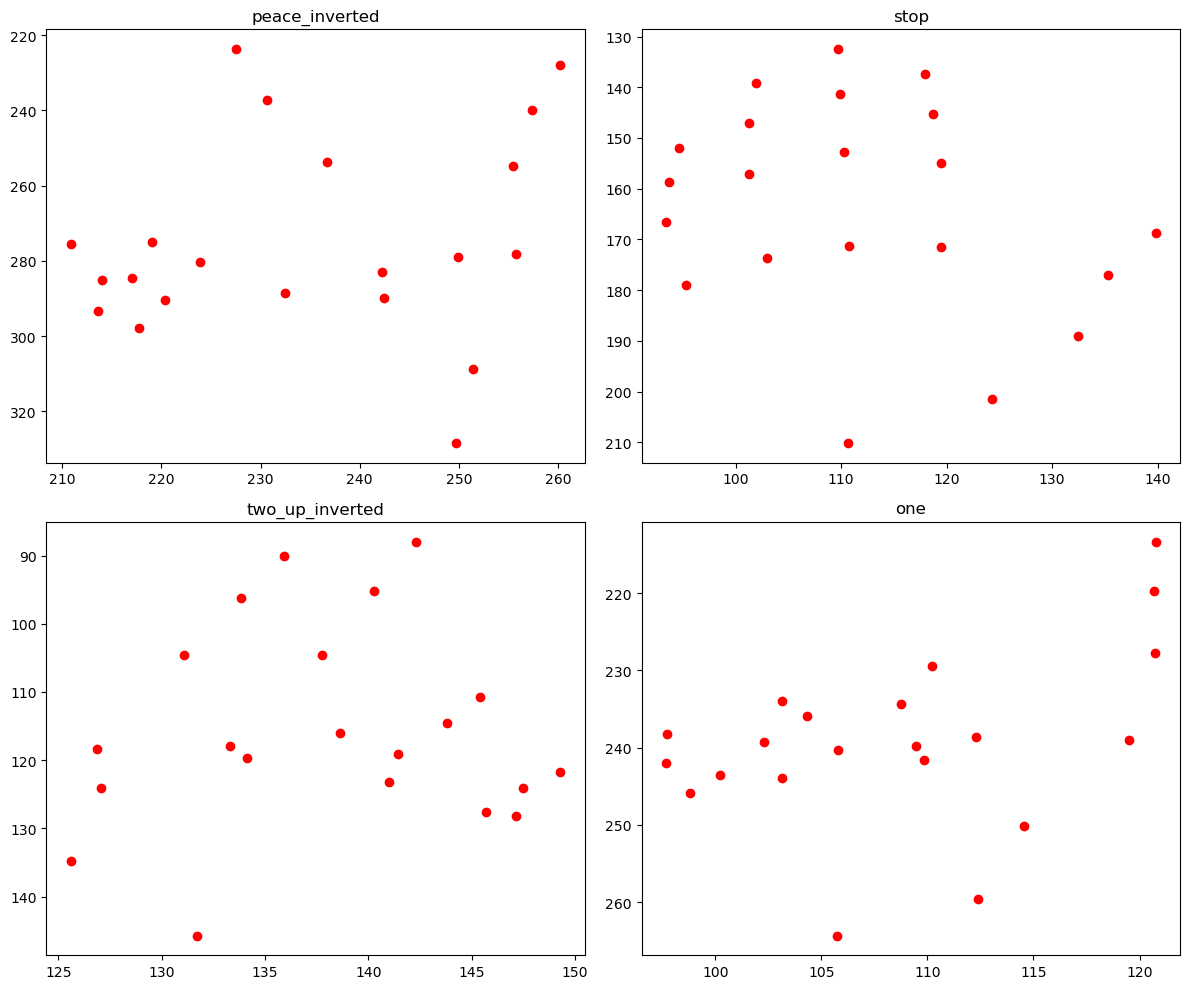

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
for i in range(4):
    row = i // 2
    col = i % 2
    ax[row, col].scatter([random_rows[f'x{j}'].values[i] for j in range(1, 22)], 
                         [random_rows[f'y{j}'].values[i] for j in range(1, 22)], color = 'red')
    ax[row, col].set_title(random_rows.iloc[i, -1])
    ax[row, col].invert_yaxis()

plt.tight_layout()
plt.show()



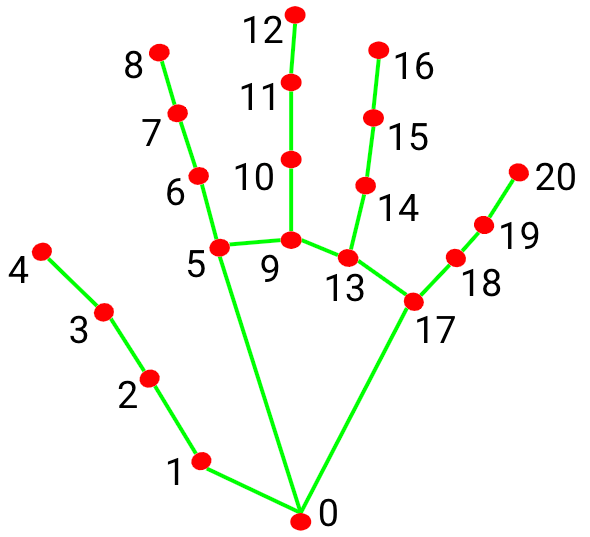

In [39]:
## Preprocessing Steps
## First, normalize each landmark by the wrist (1)
## Second, normalize each landmark by dividing it on the bigger finger which is middle finger (12, but we are 1 based so 13)

df_processed = df.copy()
wrist_x = df_processed['x1'].copy()
wrist_y = df_processed['y1'].copy()

for i in range(1, 22):
    df_processed[f'x{i}'] = df_processed[f'x{i}'] - wrist_x
    df_processed[f'y{i}'] = df_processed[f'y{i}'] - wrist_y


mid_finger_tip_position = np.sqrt(df_processed['x13']**2 + df_processed['y13']**2)
for i in range(1, 22):
    df_processed[f'x{i}'] = df_processed[f'x{i}'] / mid_finger_tip_position
    df_processed[f'y{i}'] = df_processed[f'y{i}'] / mid_finger_tip_position


df_processed.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.169097,-0.328246,0.004224,-0.508248,-0.501843,0.005798,-0.846234,...,-1.266027,-0.058407,-0.020450,-1.533293,0.026072,-0.024577,-1.759842,0.074168,-0.026722,call
1,0.0,0.0,-2.345265e-07,-0.040618,-0.498120,-0.011102,0.191551,-0.982869,-0.021096,0.349889,...,1.397837,-0.121412,-0.038175,1.691695,-0.091952,-0.037336,1.966655,-0.086635,-0.036136,call
2,0.0,0.0,-2.417307e-07,0.172978,-0.420554,-0.000184,0.437913,-0.820949,-0.009687,0.621006,...,1.404373,0.187884,-0.044068,1.676609,0.247919,-0.040469,1.913833,0.270275,-0.038301,call
3,0.0,0.0,-1.233261e-07,-0.020056,-0.468103,-0.002824,0.070355,-0.911821,-0.008911,0.114792,...,1.280797,-0.094800,-0.027622,1.529073,-0.079763,-0.027863,1.738331,-0.086693,-0.027723,call
4,0.0,0.0,-1.622995e-07,-0.009611,-0.482677,-0.002884,0.111650,-1.075914,-0.008115,0.131602,...,1.327537,-0.331511,-0.025113,1.612488,-0.386821,-0.024087,1.849127,-0.464123,-0.023486,call


In [40]:
df_processed.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.0,25675.0,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,0.0,0.0,1.272461e-07,0.014740,-0.139833,-0.009465,0.025192,-0.336521,-0.015946,0.028839,...,-0.024129,0.008403,-0.557311,-0.033751,0.007659,-0.541289,-0.032208,0.007758,-0.540012,-0.028828
std,0.0,0.0,2.737932e-07,0.243225,0.217575,0.010376,0.434557,0.425219,0.013973,0.509919,...,0.015658,0.629326,0.509256,0.020453,0.628093,0.555028,0.020877,0.640435,0.620496,0.021136
min,0.0,0.0,-2.029986e-06,-5.834705,-1.392862,-0.096630,-13.681659,-2.760927,-0.155846,-17.489483,...,-0.201897,-28.505611,-34.657750,-0.286821,-30.736563,-40.190918,-0.286470,-32.398157,-44.058062,-0.262047
25%,0.0,0.0,-5.243216e-08,-0.156725,-0.209768,-0.015199,-0.266598,-0.534523,-0.023020,-0.291434,...,-0.030728,-0.252365,-0.612102,-0.042726,-0.248055,-0.699451,-0.041957,-0.237035,-0.773254,-0.039220
50%,0.0,0.0,1.497277e-07,0.086394,-0.122418,-0.008737,0.087623,-0.301500,-0.014231,0.028274,...,-0.020969,-0.048674,-0.517549,-0.029942,-0.032086,-0.502716,-0.028510,-0.018237,-0.436731,-0.025269
75%,0.0,0.0,2.989988e-07,0.169421,-0.078231,-0.002783,0.299678,-0.227268,-0.007134,0.362566,...,-0.013661,0.255795,-0.399171,-0.019987,0.250618,-0.323693,-0.017971,0.239970,-0.260496,-0.014294
max,0.0,0.0,1.876254e-06,1.207385,8.901224,0.076365,1.872273,18.811699,0.094131,2.512387,...,0.031774,2.941622,1.206058,0.078105,3.571379,1.414245,0.104580,3.850528,1.678562,0.118668


In [12]:
choice = np.random.choice(unique_labels, size = 4)

random_rows = []
for label in choice:
    row = df_processed[df_processed['label'] == label].sample(1)
    random_rows.append(row)
    
random_rows = pd.concat(random_rows)
random_rows

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
7246,0.0,0.0,2.707834e-07,0.032805,-0.050340,0.002322,0.042255,-0.098866,-0.000487,0.053521,...,-0.014044,-0.142306,-0.042091,0.015852,-0.130058,-0.038253,0.027251,-0.106950,-0.031054,mute
5483,0.0,0.0,-1.589790e-07,0.006028,-0.024989,-0.000496,0.022084,-0.044442,-0.002580,0.031639,...,0.059783,0.006322,-0.009417,0.054599,0.004720,-0.004738,0.046875,0.006598,-0.001790,like
12451,0.0,0.0,4.658281e-08,0.026884,-0.035221,-0.007680,0.028968,-0.080705,-0.010308,0.004431,...,-0.042805,-0.101676,-0.013729,-0.028056,-0.088475,-0.013464,-0.016159,-0.071694,-0.011050,peace
8844,0.0,0.0,-7.468855e-08,-0.027415,-0.018698,-0.004085,-0.046679,-0.041471,-0.009643,-0.060344,...,0.037106,-0.104720,-0.026378,0.041507,-0.124192,-0.026835,0.044169,-0.142170,-0.027050,ok


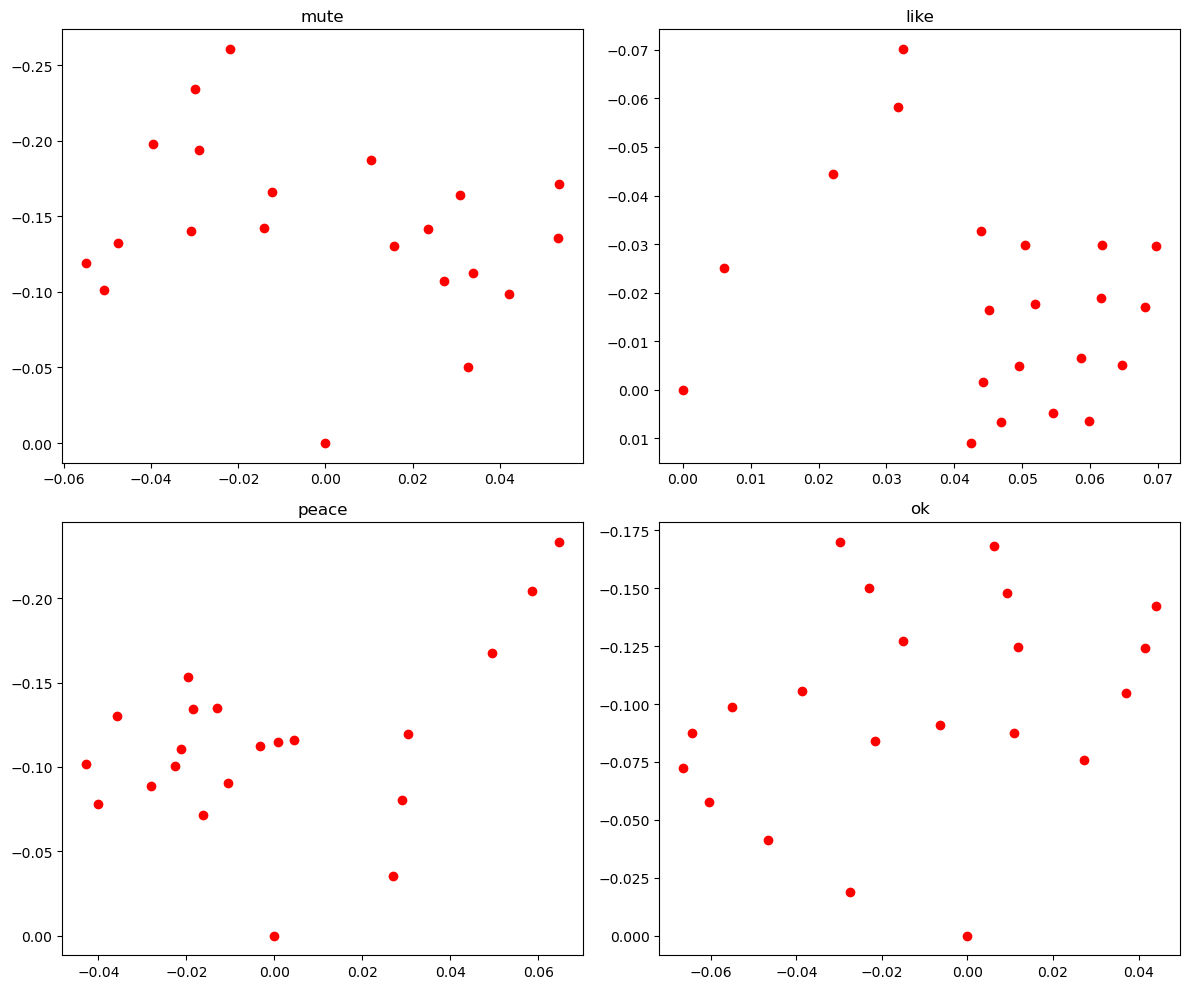

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
for i in range(4):
    row = i // 2
    col = i % 2
    ax[row, col].scatter([random_rows[f'x{j}'].values[i] for j in range(1, 22)], 
                         [random_rows[f'y{j}'].values[i] for j in range(1, 22)], color = 'red')
    ax[row, col].set_title(random_rows.iloc[i, -1])
    ax[row, col].invert_yaxis()

plt.tight_layout()
plt.show()



In [14]:
y = df_processed['label']
X = df_processed.drop(columns = ['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20540, 63), (20540,), (5135, 63), (5135,))

In [15]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7855890944498539

# Trying different models

In [ ]:
models = {
    "Logistic-Regression-Baseline": LogisticRegression(max_iter=1000),
    "SVM-Baseline": SVC(),
    "KNN-Baseline": KNeighborsClassifier(),
    "Random-Forest-Baseline": RandomForestClassifier(),
}

results = {}

for name, model in models.items():
    with mlu.start_run(run_name=name):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Log model parameters
        mlu.log_params(model.get_params())

        # Log metrics
        metrics = mlu.log_metrics(y_test, y_pred)

        # Log the trained model artifact
        mlu.log_model(model, artifact_path="model")

        # Log confusion matrix
        mlu.log_confusion_matrix(y_test, y_pred, labels=sorted(y.unique()), filename=f"{name}_confusion_matrix.png")

        results[name] = metrics
        mlu.end_run()

results

{'Logistic Regression': {'Accuracy': 0.7863680623174294,
  'Precision': 0.7859184081538887,
  'Recall': 0.7863680623174294,
  'F1 Score': 0.7834788919282611},
 'SVM': {'Accuracy': 0.9320350535540409,
  'Precision': 0.9382827896234178,
  'Recall': 0.9320350535540409,
  'F1 Score': 0.9325921890994426},
 'KNN': {'Accuracy': 0.9550146056475171,
  'Precision': 0.9552620373926258,
  'Recall': 0.9550146056475171,
  'F1 Score': 0.9550757049079222},
 'Random Forest': {'Accuracy': 0.9561830574488802,
  'Precision': 0.9565131806988817,
  'Recall': 0.9561830574488802,
  'F1 Score': 0.9562418050920543}}

In [ ]:
with mlu.start_run(run_name="SVM-Tuned"):
    svm = SVC(class_weight='balanced')

    param_dist = {
        'kernel': ['rbf'],
        'C': loguniform(1e-3, 1e3),
        'gamma': loguniform(1e-4, 1e1)
    }

    svm_random = RandomizedSearchCV(
        svm,
        param_distributions=param_dist,
        n_iter=40,
        cv=5,
        random_state=42,
    )

    svm_random.fit(X_train, y_train)
    y_pred_svm = svm_random.predict(X_test)

    mlu.log_params(svm_random.best_params_)
    svm_tuned_metrics = mlu.log_metrics(y_test, y_pred_svm)
    mlu.log_model(svm_random.best_estimator_, artifact_path="model")
    mlu.log_confusion_matrix(y_test, y_pred_svm, labels=sorted(y.unique()), filename="SVM-Tuned_confusion_matrix.png")
    svm_run_id = mlu.get_run_id()
    mlu.end_run()

print("Best params:", svm_random.best_params_)
print("Test accuracy:", svm_random.score(X_test, y_test))

Best params: {'C': 622.0025976819159, 'gamma': 1.1015056790269626, 'kernel': 'rbf'}
Test accuracy: 0.9846153846153847


In [ ]:
with mlu.start_run(run_name="KNN-Tuned"):
    knn = KNeighborsClassifier()

    knn_param_dist = {
        'n_neighbors': randint(1, 30),
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }

    knn_random = RandomizedSearchCV(
        knn,
        param_distributions=knn_param_dist,
        n_iter=30,
        cv=5,
        random_state=42,
    )

    knn_random.fit(X_train, y_train)
    y_pred_knn = knn_random.predict(X_test)

    mlu.log_params(knn_random.best_params_)
    knn_tuned_metrics = mlu.log_metrics(y_test, y_pred_knn)
    mlu.log_model(knn_random.best_estimator_, artifact_path="model")
    mlu.log_confusion_matrix(y_test, y_pred_knn, labels=sorted(y.unique()), filename="KNN-Tuned_confusion_matrix.png")
    mlu.end_run()

print("KNN Best params:", knn_random.best_params_)
print("KNN Test accuracy:", knn_random.score(X_test, y_test))

KNN Best params: {'n_neighbors': 8, 'p': 2, 'weights': 'distance'}
KNN Test accuracy: 0.9577409931840312


In [ ]:
with mlu.start_run(run_name="Random-Forest-Tuned"):
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)

    rf_param_dist = {
        'n_estimators': randint(50, 500),
        'max_depth': randint(2, 20),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 20),
        'bootstrap': [True, False]
    }

    rf_random = RandomizedSearchCV(
        rf,
        param_distributions=rf_param_dist,
        n_iter=30,
        cv=5,
        random_state=42,
    )

    rf_random.fit(X_train, y_train)
    y_pred_rf = rf_random.predict(X_test)

    mlu.log_params(rf_random.best_params_)
    rf_tuned_metrics = mlu.log_metrics(y_test, y_pred_rf)
    mlu.log_model(rf_random.best_estimator_, artifact_path="model")
    mlu.log_confusion_matrix(y_test, y_pred_rf, labels=sorted(y.unique()), filename="Random-Forest-Tuned_confusion_matrix.png")
    mlu.end_run()

print("RF Best params:", rf_random.best_params_)
print("RF Test accuracy:", rf_random.score(X_test, y_test))

RF Best params: {'bootstrap': True, 'max_depth': 18, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 468}
RF Test accuracy: 0.944888023369036


In [ ]:
# Collect tuned results for comparison
tuned_results = {
    "SVM-Tuned": svm_tuned_metrics,
    "KNN-Tuned": knn_tuned_metrics,
    "Random-Forest-Tuned": rf_tuned_metrics,
}

tuned_df = mlu.build_comparison_table(tuned_results)
print(tuned_df.to_string())

SVM accuracy :  0.9846153846153847
SVM f1_score :  0.9846283706851442
SVM recall_score :  0.9846153846153847
SVM precision_score : 0.9847492141624462


In [ ]:
# Build full comparison table (baseline + tuned)
all_results = {**results, **tuned_results}
comparison_df = mlu.build_comparison_table(all_results)

# Plot & log comparison chart as MLflow artifact
with mlu.start_run(run_name="model-comparison-chart"):
    fig = mlu.plot_comparison_chart(comparison_df, filename="model_comparison.png")
    mlu.end_run()

comparison_df

KNN accuracy :  0.9577409931840312
KNN f1_score :  0.9577416780056331
KNN recall_score :  0.9577409931840312
KNN precision_score : 0.9580780919782946


In [ ]:
# Register the best model (Tuned SVM) in the MLflow Model Registry
result = mlu.register_model(
    run_id=svm_run_id,
    artifact_path="model",
    registry_name="Hand-Gesture-SVM-Champion"
)
print(f"Registered model: {result.name}, version: {result.version}")

Random Forest accuracy :  0.944888023369036
Random Forest f1_score :  0.9449354947120604
Random Forest recall_score :  0.944888023369036
Random Forest precision_score : 0.9453845317953895


In [ ]:
import joblib
joblib.dump(svm_random, "svm_winner.pkl")
print("Best model saved to svm_winner.pkl")

['svm_winner.pkl']


---

### Performance Before GridSearch

| Model               | Accuracy | Precision | Recall | F1-Score |
| ------------------- | -------- | --------- | ------ | -------- |
| Logistic Regression | 0.7864   | 0.7859    | 0.7864 | 0.7835   |
| SVM                 | 0.9320   | 0.9383    | 0.9320 | 0.9326   |
| KNN                 | 0.9550   | 0.9553    | 0.9550 | 0.9551   |
| Random Forest       | 0.9562   | 0.9565    | 0.9562 | 0.9562   |

---

### Performance After GridSearch

| Model         | Accuracy | Precision | Recall | F1-Score |
| ------------- | -------- | --------- | ------ | -------- |
| SVM           | 0.9846   | 0.9847    | 0.9846 | 0.9846   |
| KNN           | 0.9577   | 0.9581    | 0.9577 | 0.9577   |
| Random Forest | 0.9449   | 0.9454    | 0.9449 | 0.9449   |

---




In [48]:
import cv2
import mediapipe as mp
import numpy as np
import joblib

classifier = joblib.load("svm_winner.pkl")

hand_module = mp.solutions.hands
drawer = mp.solutions.drawing_utils
detector = hand_module.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)

camera = cv2.VideoCapture(0)

w = int(camera.get(3))
h = int(camera.get(4))

codec = cv2.VideoWriter_fourcc(*'mp4v')
writer = cv2.VideoWriter("output.mp4", codec, 30, (w, h))

while camera.isOpened():
    success, img = camera.read()
    if not success:
        break

    img = cv2.flip(img, 1)

    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    detection = detector.process(rgb_img)

    if detection.multi_hand_landmarks:
        for hand_data in detection.multi_hand_landmarks:
            coords = np.array([(lm.x, lm.y, lm.z) for lm in hand_data.landmark])

            wx, wy, wz = coords[0]
            coords[:, 0] -= wx
            coords[:, 1] -= wy

            mx, my, _ = coords[12]
            sf = np.sqrt(mx**2 + my**2)
            coords[:, 0] /= sf
            coords[:, 1] /= sf

            feat = coords.flatten().reshape(1, -1)

            pred = classifier.predict(feat)[0]

            drawer.draw_landmarks(img, hand_data, hand_module.HAND_CONNECTIONS)

            cv2.putText(img, f'Prediction: {pred}', (50, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    writer.write(img)

    cv2.imshow("Hand Gesture Recognition", img)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
writer.release()
cv2.destroyAllWindows()

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.6.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GridSearchCV from version 1.6.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please us

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype()

C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pc\MachineLearning\Sample_project_1\env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype()

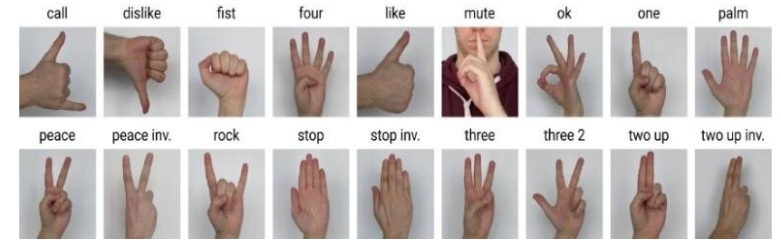